In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score, average_precision_score
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import BorderlineSMOTE,SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight



In [2]:
"""https://drive.google.com/file/d/1hPkqP4rcfbtwWalXJPWD7wueHbvDWNE4/view?usp=sharing"""
with h5py.File('/content/drive/MyDrive/projet final/X_train_new.h5', 'r') as f:
  ls=list(f.keys())
  print(f"list of datasets in this file {ls}")
  data=f.get('features')
  dataset=np.array(data)
  print(f"Shape of dataset1 {dataset.shape}")


list of datasets in this file ['features']
Shape of dataset1 (946, 40, 7, 500)


In [3]:
#dataset de test
"""https://drive.google.com/file/d/1hPkqP4rcfbtwWalXJPWD7wueHbvDWNE4/view?usp=sharing"""
with h5py.File('/content/drive/MyDrive/projet final/X_test_new.h5', 'r') as f:
  ls=list(f.keys())
  print(f"list of datasets in this file {ls}")
  data_test=f.get('features')
  dataset_test=np.array(data_test)
  print(f"Shape of dataset1 {dataset_test.shape}")



list of datasets in this file ['features']
Shape of dataset1 (946, 40, 7, 500)


In [4]:
y_set=pd.read_csv('/content/drive/MyDrive/projet final/y_train_AvCsavx.csv')

In [5]:
y_set.head()

,id,label
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


In [6]:
# Supprimer la colonne 'id' de la variable cible Y
Y = y_set.drop('id', axis=1)

In [7]:
Y.head()

,label
0,0
1,1
2,0
3,1
4,0


In [8]:
#normalized_dataset = tf.keras.utils.normalize(dataset)


In [9]:
#normalized_dataset = np.array(normalized_dataset)
#normalized_dataset


In [10]:
Y=np.array(Y['label'])

In [11]:
def z_score_normalization(etensor):
  mean = etensor.mean(axis=(1, 2, 3), keepdims=True)
  # Calcul de la moyenne sur les dimensions échantillons
  std = etensor.std(axis=(1, 2, 3), keepdims=True)
  # Calcul de l'écart-type sur les dimensions échantillons
  normalized_tensor = (etensor - mean) / std # Normalisation z-score
  return normalized_tensor

In [12]:
normalized_dataset=z_score_normalization(dataset)

In [13]:
#normalized_dataset

In [14]:
#X_train, X_val, y_train, y_val = train_test_split(normalized_dataset, Y, test_size=0.4,stratify=Y ,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(normalized_dataset, Y, test_size=0.3,stratify=Y ,random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(normalized_dataset, y_train_resampled, test_size=0.2,stratify=y_train_resampled ,random_state=42)



In [15]:
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))  # Aplatir les dimensions sauf la première
X_val_reshaped   = X_val.reshape((X_val.shape[0], -1))
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)

(662, 140000)
(284, 140000)


In [16]:
# Initialisation de Borderline-SMOTE
borderline_smote = BorderlineSMOTE()
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train_reshaped,y_train)
X_val_resampled, y_val_resampled = borderline_smote.fit_resample(X_val_reshaped, y_val)
#Initialisation de smote
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, Y)
# X_val_resampled, y_val_resampled = smote.fit_resample(X_val_reshaped, Y)
# Reshape du tensor oversampled dans sa forme originale

In [17]:
# print("Performing preprocessings on train set...")
# #print(X_train_resampled.head())
# scaler = StandardScaler()
# scaler.fit(X_train_resampled)

# # Transformer les données d'entraînement et de validation
# X_train_resampled = scaler.transform(X_train_resampled)
# X_val_resampled = scaler.transform(X_val_resampled)
# print('...Done.')
# print(X_train_resampled[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
# print()
# print('...Done.')
# print(X_val_resampled[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
# print()

In [18]:
# Reshape du tensor oversampled dans sa forme originale
X_train_resampled = X_train_resampled.reshape((-1, 40, 7, 500))
X_val_resampled = X_val_resampled.reshape((-1, 40, 7, 500))
# Vérifier les dimensions des données
print("Dimensions du tensor oversampled :", X_train_resampled.shape)
print("Dimensions de la target oversampled :", y_train_resampled.shape)
print("Dimensions du tensor oversampled (val):", X_val_resampled.shape)
print("Dimensions de la target oversampled (val) :", y_val_resampled.shape)

# Remettre en forme les données d'entraînement
X_train_resampled = X_train_resampled.reshape(-1, 40, 7, 500)
X_val_resampled = X_val_resampled.reshape(-1, 40, 7, 500)


Dimensions du tensor oversampled : (1032, 40, 7, 500)
Dimensions de la target oversampled : (1032,)
Dimensions du tensor oversampled (val): (442, 40, 7, 500)
Dimensions de la target oversampled (val) : (442,)


In [19]:
# X_train_reshaped = X_train.reshape((X_train.shape[0], -1))  # Aplatir les dimensions sauf la première
# X_val_reshaped   = X_val.reshape((X_val.shape[0], -1))
# print(X_train_reshaped.shape)
# # Initialisation de Borderline-SMOTE
# borderline_smote = BorderlineSMOTE()
# X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train_reshaped,y_train)
# X_val_resampled, y_val_resampled = borderline_smote.fit_resample(X_val_reshaped, y_val)
# #Initialisation de smote
# # smote = SMOTE(random_state=42)
# # X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reshaped, Y)
# # X_val_resampled, y_val_resampled = smote.fit_resample(X_val_reshaped, Y)
# # Reshape du tensor oversampled dans sa forme originale
# X_train_resampled = X_train_resampled.reshape((-1, 40, 7, 500))
# X_val_resampled = X_val_resampled.reshape((-1, 40, 7, 500))
# # Vérifier les dimensions des données
# print("Dimensions du tensor oversampled :", X_train_resampled.shape)
# print("Dimensions de la target oversampled :", y_train_resampled.shape)
# print("Dimensions du tensor oversampled (val):", X_val_resampled.shape)
# print("Dimensions de la target oversampled (val) :", y_val_resampled.shape)



# # Remettre en forme les données d'entraînement
# X_train_resampled = X_train_resampled.reshape(-1, 40, 7, 500)
# X_val_resampled = X_val_resampled.reshape(-1, 40, 7, 500)


In [20]:
# model_CNN = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(40, 7, 500), padding='same'),
#     tf.keras.layers.Dropout (0.15),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(64, kernel_size=(2,2), activation='relu'),
#     tf.keras.layers.Dropout (0.15),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
#     tf.keras.layers.Dropout (0.15),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     #tf.keras.layers.Dropout (0.25),
#     tf.keras.layers.Dense(256, activation='relu'),
#     #tf.keras.layers.Dropout (0.25),
#     tf.keras.layers.Dense(2, activation='softmax')
#     ])

In [21]:
#Model_1
# model_CNN = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu', input_shape=(40,7,500), padding='same'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

#     tf.keras.layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#     #tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Conv2D(filters=50, kernel_size=(1, 1), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(pool_size=(1, 1)),
#     # tf.keras.layers.Conv2D(filters=50, kernel_size=(1, 1), activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(2, activation='softmax')
# ])


In [22]:
# model_CNN = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(40, 7, 500), padding='same'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     #tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2,2)),
#     #tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Conv2D(128, kernel_size=(1, 1), activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(2, activation='softmax')  # Modification de la sortie pour 2 classes
# ])


In [23]:
model_CNN = tf.keras.Sequential([

    tf.keras.layers.Conv1D(filters=100,kernel_size =3,activation ='relu', input_shape =(40, 7, 500) , padding ='same'),
    tf.keras.layers.MaxPooling2D(pool_size =2),
    tf.keras.layers.Conv1D(filters=100,kernel_size=1,activation ='relu'),
    tf.keras.layers.Conv1D(filters=100,kernel_size=1,activation ='relu'),

    tf.keras.layers.Dropout (0.25),
    tf.keras.layers.Flatten (),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(512, activation='relu'),
    # #tf.keras.layers.Dropout(0.15),
    # #tf.keras.layers.Dense(1, activation='sigmoid')
    tf.keras.layers.Dense(2, activation='softmax')
    ])


In [24]:
model_CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 7, 100)        150100    
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 3, 100)        0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 3, 100)        10100     
                                                                 
 conv1d_2 (Conv1D)           (None, 20, 3, 100)        10100     
                                                                 
 dropout (Dropout)           (None, 20, 3, 100)        0         
                                                                 
 flatten (Flatten)           (None, 6000)              0         
                                                        

In [25]:
# Convertir les étiquettes d'entraînement et de validation en format catégoriel
y_train_resampled_categorical = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)
y_val_resampled_categorical = tf.keras.utils.to_categorical(y_val_resampled, num_classes=2)

In [26]:
#optimizer = tf.keras.optimizers.Adam()#, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
optimizer = tf.keras.optimizers.Adadelta()
#optimizer = tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.99, beta_2=0.999, epsilon=1e-8)
#model_CNN.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)#,callbacks=[early_stopping]
m = model_CNN.fit(X_train_resampled, y_train_resampled_categorical, epochs=10, batch_size=8, validation_data=(X_val_resampled, y_val_resampled_categorical))#,callbacks=[early_stopping])


Epoch 1/10
129/129 [==============================] - 15s 105ms/step - loss: 0.9323 - accuracy: 0.5010 - val_loss: 0.7464 - val_accuracy: 0.5158
Epoch 2/10
129/129 [==============================] - 21s 167ms/step - loss: 0.8278 - accuracy: 0.5136 - val_loss: 0.7172 - val_accuracy: 0.5656
Epoch 3/10
129/129 [==============================] - 13s 97ms/step - loss: 0.7930 - accuracy: 0.5262 - val_loss: 0.7134 - val_accuracy: 0.5724
Epoch 4/10
129/129 [==============================] - 12s 94ms/step - loss: 0.7704 - accuracy: 0.5262 - val_loss: 0.7125 - val_accuracy: 0.5882
Epoch 5/10
129/129 [==============================] - 13s 98ms/step - loss: 0.7583 - accuracy: 0.5368 - val_loss: 0.7121 - val_accuracy: 0.5995
Epoch 6/10
129/129 [==============================] - 10s 81ms/step - loss: 0.7482 - accuracy: 0.5523 - val_loss: 0.7110 - val_accuracy: 0.6018
Epoch 7/10
129/129 [==============================] - 13s 99ms/step - loss: 0.7461 - accuracy: 0.5688 - val_loss: 0.7087 - val_accurac

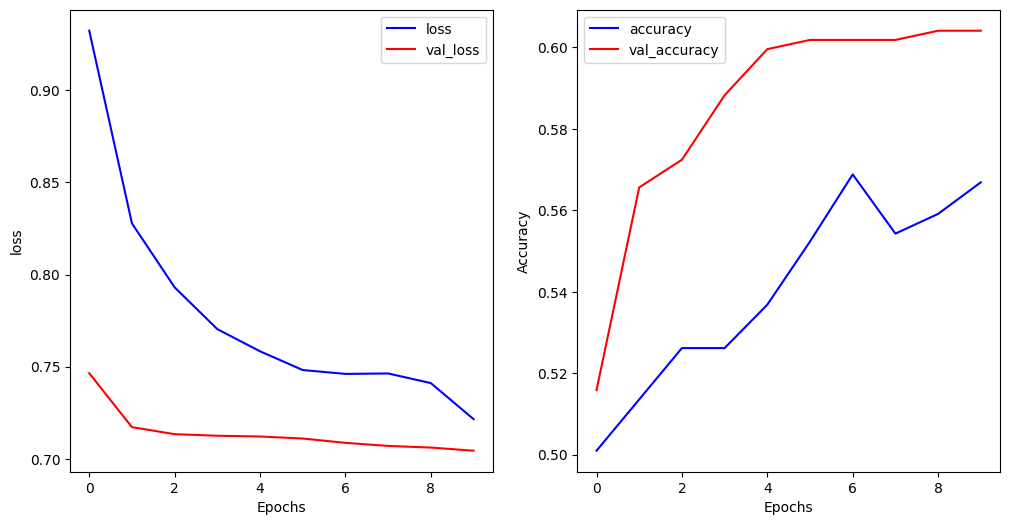

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(m.history["loss"], color="b")
plt.plot(m.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(labels=['loss','val_loss'])
# Visualization of accuracy training
plt.subplot(1, 2, 2)
plt.plot(m.history["accuracy"], color="b")
plt.plot(m.history["val_accuracy"], color="r")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(labels=['accuracy','val_accuracy'])

30/30 [==============================] - 5s 153ms/step


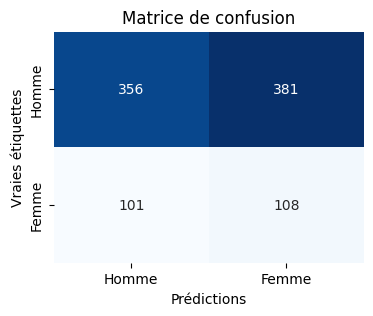

In [29]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score

# Prédiction sur les données de validation
y_pred = model_CNN.predict(dataset_test)
y_pred
# Convertir les probabilités en classes prédites (0 ou 1)
#y_pred_classes = (y_pred > 0.5).astype(int)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir les probabilités en classes prédites (argmax)

# Calculer la matrice de confusion
y_test=y_set.drop('id', axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Homme', 'Femme'], yticklabels=['Homme', 'Femme'], cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()



In [30]:
# Calculer le rappel (recall) pour la classe positive (1)
recall = recall_score(y_test, y_pred_classes)
print("Rappel (recall) :", recall)

# Calculer le score F1
f1 = f1_score(y_test, y_pred_classes)
print("Score F1 :", f1)



Rappel (recall) : 0.5167464114832536
Score F1 : 0.30945558739255014


#Les param
##learning_rate :
Taux d'apprentissage, qui contrôle la taille des pas effectués lors de la mise à jour des poids du réseau neuronal pendant l'entraînement. Il définit la vitesse à laquelle le modèle apprend à partir des données.

##beta_1 :
Le paramètre de décroissance exponentielle pour les estimations de premier ordre. C'est le taux auquel l'estimation moyenne mobile du gradient de premier ordre est mise à jour.

##beta_2 :
Le paramètre de décroissance exponentielle pour les estimations de second ordre. C'est le taux auquel l'estimation moyenne mobile du gradient de second ordre est mise à jour.

##epsilon :
 Un petit nombre ajouté au dénominateur pour éviter la division par zéro lors du calcul des mises à jour des poids.

